## MCMC Results when reconstructing only circular velocities $V_c$

In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import time
from functools import reduce
import emcee
import corner
sys.path.append("../gaia_tools/")
import data_analysis
import transformation_constants
import covariance_generation
from import_functions import import_data

In [4]:
filename = "/home/sven/repos/gaia-tools/out/mcmc_sampler/sampler_2022-04-14-15-39-18.h5"

In [5]:
reader = emcee.backends.HDFBackend(filename, read_only=True)

In [31]:
samples_data = reader.get_chain()
samples_data.shape

(1500, 50, 5)

In [29]:
xdf = [num for num in range(0, samples_data.shape[2], 1)]
theta_labels = ['V_{c%s}' %str(i+1) for i in xdf]

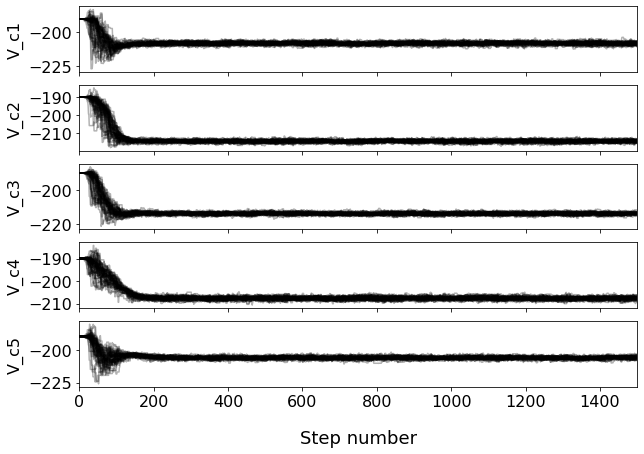

In [19]:
num_parameters = len(theta_labels)

fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

for i in range(num_parameters):
    ax = axes[i]
    ax.plot(samples_data[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_data))
    
    ax.set_ylabel(theta_labels[i], fontsize=16)
    ax.yaxis.set_label_coords(-0.1, 0.5)      
    ax.tick_params(axis='both', which='major', labelsize=16)
    axes[-1].set_xlabel("Step number", labelpad = 20, fontsize=18)
    
#plt.savefig("MCMC_Walkers", dpi=300)
plt.show()

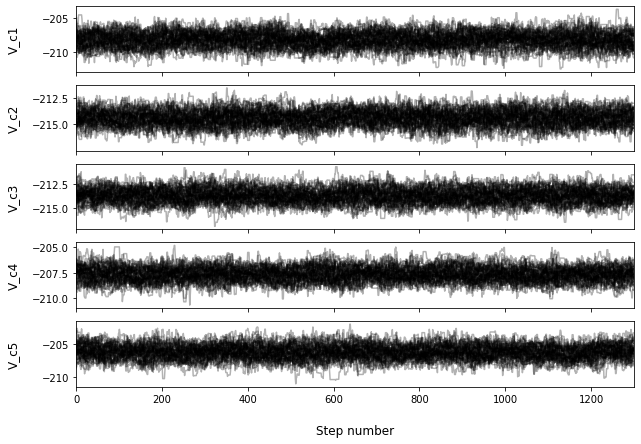

In [20]:
samples_data = reader.get_chain(discard = 200)

num_parameters = len(theta_labels)

fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

for i in range(num_parameters):
    ax = axes[i]
    ax.plot(samples_data[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_data))
    ax.set_ylabel(theta_labels[i], fontsize=12)
    ax.yaxis.set_label_coords(-0.1, 0.5)                                                 
    axes[-1].set_xlabel("Step number", labelpad = 20, fontsize=12);
    

#plt.savefig("MCMC_Walkers_Discarded_Burnin", dpi=300)
plt.show()

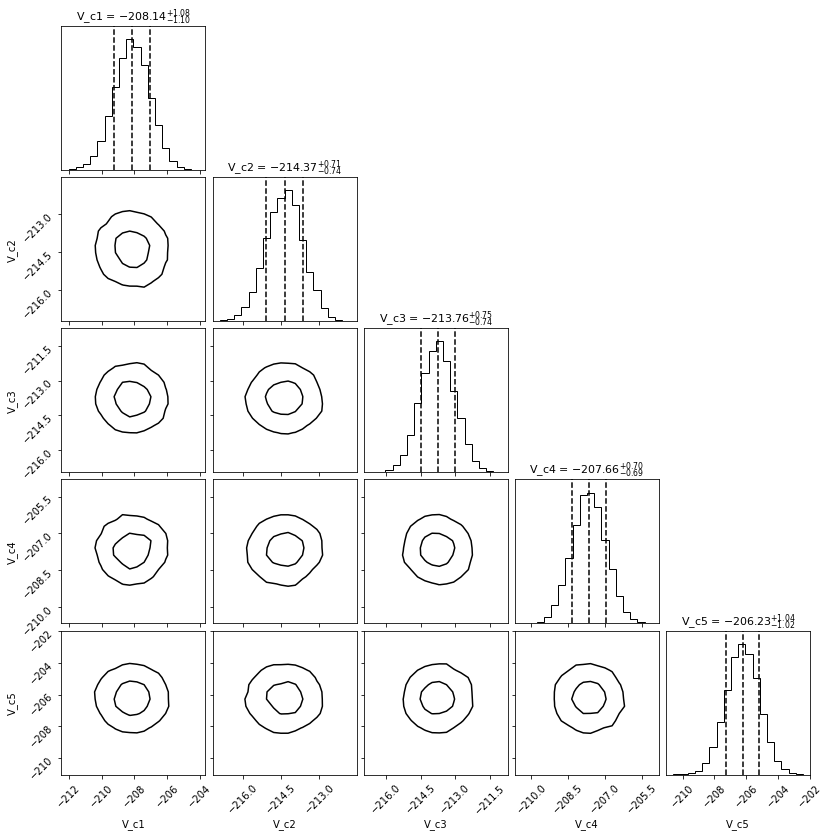

In [21]:
# Flattens the result: nwalkers x steps
flatchain = reader.get_chain(flat=True, discard = 200)
'''
fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    truths=[transformation_constants.R_0, 
                            transformation_constants.Z_0, 
                            transformation_constants.V_SUN[0][0], 
                            transformation_constants.V_SUN[1][0], 
                            transformation_constants.V_SUN[2][0]],
                    
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_kwargs={"fontsize": 12});
'''


fig = corner.corner(flatchain, 
                    labels=theta_labels,
                    levels = (1-np.exp(-0.5), 1-np.exp(-2)),
                    plot_datapoints = False,
                    plot_density = False,
                    fill_countours = False,
                    smooth = 0.5,
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, 
                    title_kwargs={"fontsize": 11});

#fig.suptitle('MCMC sampler corner plot', fontsize=28, x=0.65, y= 0.9)
#plt.savefig("Corner_Plt_05052021", dpi=300)

plt.savefig("Corner_Plot", dpi=300)
plt.show()

In [30]:
from IPython.display import display, Math
#theta_labels = ['U_{sun}','V_{sun}']
for i in range(len(theta_labels)):
    mcmc = np.percentile(flatchain[:, i], [16, 50, 84])
    
    q = np.diff(mcmc)
    
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], theta_labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>